# Sound tutorial
This notebook intends to show several perspectives on sound: how do we hear, how the signal "really" looks like, and how can we represent and process it.

## Let's begin by hearing a note played on a cello

In [1]:
import IPython
wav_name = "Sounds/cello-mono.wav"
IPython.display.Audio(wav_name)

There are lots of ways to produce sound, but it always arrives to our ears as pressure changes in the air.

### Now let's see how the complete signal, or waveform, looks like


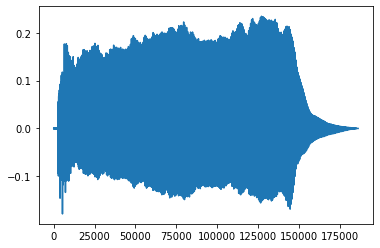

In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


mono = False
data, sr = librosa.load(wav_name, sr=None, mono=mono)

plt.plot(data)

The envelope of the waveform roughly matches the evolution of intensity we hear.

### And now let's see a zoom of the waveform

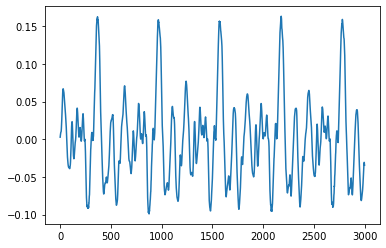

In [3]:
start = 20000
offset = 3000
plt.plot(data[start:start+offset])

We can see a continuosly changing signal with a repeating pattern. The frequency (or "how often does the waveform repeats", in cycles/second or Hertz) is defined as the inverse of peak-to-peak time: the shorter this time, the higher the frequency.

### This shape is typical from analog sound devices, such as a vinyl record

![](Images/vinilo.png)

## However, in fact we just hear one note, rather than all those peaks!
So we could roughly simplify the previous waveform just representing a point in a frequency plot:

![](Images/Note_frequency.png)

## We can ask ourselves, how do we hear, i.e. how do we perceive time variation as frequency?

First, the air pressure changes are translated into mechanical movement in the inner ear, which in turn makes vibrate the fluid in the snail-shaped organum called cochlea.

![](Images/cochlea2.png)

If we could unroll the cochlea, we would see it is composed of hair cells (or cilia), each of which is sensible to just one frequency, so we could map the previous frequency plot onto the unrolled cochlea.

## But how do this hair cells work?

Inner hair cells convert sound vibrations from the fluid in the cochlea into frequency-specific electrical signals that are then transmitted via the auditory nerve to the brain.

This electron microscope picture shows inner hair cells (cilia) and detail of filaments linking cilia:
![](Images/inner_hair_cell.png)
Source: TED talk by Jim Hudspeth "The beautiful, mysterious science of how you hear" https://youtu.be/hn8N8p9P5gw?t=152 

Each "hair" (stereocilium) is linked to others by means of a filament protein. When cochlea fluid moves, any hair that follows this movement pulls the filaments from other hairs and ion channels open, thus releasing millions of calcium and potassium ions which constitute an electrical signal that excites the cell; this excitation is passed to a neurofiber and propagates into the brain. Each hair cell has a bunch of stereocilia which are sensible to just one specific frequency movement.

Next picture shows how close are the cilia which sense two successive piano notes.
![](Images/one_step_cilia.png)

Source: TED talk by Jim Hudspeth "The beautiful, mysterious science of how you hear" https://youtu.be/hn8N8p9P5gw?t=526

## What if now we have a violin playing a scale up and down?

In [27]:
wav_name2 = "Sounds/violin-scale.wav"
IPython.display.Audio(wav_name2)

Our simplified frequency plot cannot represent notes being played in different times. We could think on combining the time and frequency domains in the same plot:
* Time in x-axis
* Frequency in y-axis
* Sound loudness as color: from darkest (softer sound) to brightest (louder sound)

This plot combining time and frequency domains is called **spectrogram** and is made by sliding a time window and computing which frequencies are present on that time window.

It is also worth noting that we perceive two frequencies as related if the frequency of one is twice the frequency of the other in 
the scale of the 

## Let's see the spectrogram of the violin waveform

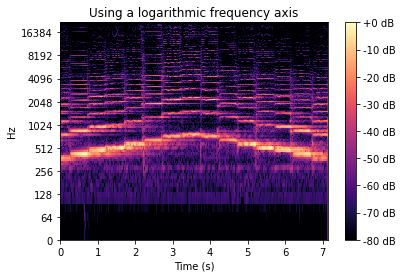

In [30]:
data2, sr = librosa.load(wav_name2, sr=None)
# STFT of data2; hop_length=512 by default, n_fft=2048
D = librosa.stft(data2)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='s', y_axis='log', ax=ax, sr=sr)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In the (log)spectrogram we can appreciate the scale notes going up and down. The main frequencies are the strongest and have the brigthest color, and for each main frequency there are weaker multiples called harmonics or partials, which are produced naturally during the violin strings vibrations.